In [1]:
import os
import sys
import time
import numpy as np
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

from sklearn.cross_validation import train_test_split
# true, then pred
from sklearn.metrics import log_loss
from sklearn import preprocessing
from sklearn.grid_search import GridSearchCV

from sklearn.preprocessing import PolynomialFeatures

from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('white')
sns.set_context('notebook')

import pickle
from sklearn.externals import joblib

In [2]:
from sknn.mlp import Classifier, Layer

In [3]:
import amyutility as p2

In [4]:
reload(p2)

<module 'amyutility' from 'amyutility.pyc'>

# Load Data

In [5]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [6]:
print train.shape
print test.shape

(43436, 23)
(14479, 23)


In [7]:
traink = pd.read_csv('data/fromKen/full_train_2.csv')
testk = pd.read_csv('data/fromKen/full_test_2.csv')

In [8]:
print traink.shape
print testk.shape

(43436, 56)
(14479, 55)


# Data Exploration

In [9]:
test.head()

,age,sex,region,nregions,memtype,memmonths,mem_mag1,mem_mag2,hasemail,r1,r2,r3,r.quick,extra,intl,r.intl,allgames1yr,allgames5yr,fastevents,medevents,slowevents,nfloor,Id
0,29.00,M,reg127,1,N,2,Y,N,N,nan,nan,2024.00,nan,N,N,nan,0,0,0,0,0,0,1
1,16.00,M,reg142,1,N,258,N,N,Y,2753.00,2751.00,2709.00,3528.00,N,N,nan,10,223,0,57,7,0,2
2,22.00,M,reg104,1,N,28,N,N,Y,nan,nan,1668.00,2910.00,N,N,nan,6,6,2,1,0,0,3
3,10.00,M,reg112,1,N,14,N,N,Y,nan,nan,741.00,1107.00,N,N,nan,13,13,0,2,1,0,4
4,14.00,F,reg106,1,N,131,N,N,N,359.00,325.00,531.00,654.00,N,N,nan,14,57,0,16,1,0,5


In [10]:
train.columns

Index([u'lapsed', u'age', u'sex', u'region', u'nregions', u'memtype', u'memmonths', u'mem_mag1', u'mem_mag2', u'hasemail', u'r1', u'r2', u'r3', u'r.quick', u'extra', u'intl', u'r.intl', u'allgames1yr', u'allgames5yr', u'fastevents', u'medevents', u'slowevents', u'nfloor'], dtype='object')

## Using Ken's Data

In [11]:
traink.columns

Index([u'lapsed', u'age', u'sex', u'region', u'nregions', u'memtype', u'memmonths', u'mem_mag1', u'mem_mag2', u'hasemail', u'r1', u'r2', u'r3', u'r.quick', u'extra', u'intl', u'r.intl', u'allgames1yr', u'allgames5yr', u'fastevents', u'medevents', u'slowevents', u'nfloor', u'age.na', u'r1.na', u'r2.na', u'r3.na', u'r.quick.na', u'r.intl.na', u'mon_less30', u'mon_31', u'mon_32', u'mon_33', u'mon_34', u'mon_35', u'mon_36', u'mon_37_60', u'mon_61_84', u'mon_85_120', u'mon_121_263', u'mon_264_plus',
       u'games_0', u'games_1_5', u'games_6_10', u'games_11_20', u'games_21_34', u'games_35_49', u'games_50_plus', u'agesq', u'agecbd', u'allgames1yrsq', u'allgames1yrcbd', u'allgames5yrsq', u'allgames5yrcbd', u'memmonthssq', u'memmonthscbd'],
      dtype='object')

In [12]:
testk.columns

Index([u'age', u'sex', u'region', u'nregions', u'memtype', u'memmonths', u'mem_mag1', u'mem_mag2', u'hasemail', u'r1', u'r2', u'r3', u'r.quick', u'extra', u'intl', u'r.intl', u'allgames1yr', u'allgames5yr', u'fastevents', u'medevents', u'slowevents', u'nfloor', u'age.na', u'r1.na', u'r2.na', u'r3.na', u'r.quick.na', u'r.intl.na', u'mon_less30', u'mon_31', u'mon_32', u'mon_33', u'mon_34', u'mon_35', u'mon_36', u'mon_37_60', u'mon_61_84', u'mon_85_120', u'mon_121_263', u'mon_264_plus',
       u'games_0', u'games_1_5', u'games_6_10', u'games_11_20', u'games_21_34', u'games_35_49', u'games_50_plus', u'agesq', u'agecbd', u'allgames1yrsq', u'allgames1yrcbd', u'allgames5yrsq', u'allgames5yrcbd', u'memmonthssq', u'memmonthscbd'],
      dtype='object')

In [13]:
traink.head()

,lapsed,age,sex,region,nregions,memtype,memmonths,mem_mag1,mem_mag2,hasemail,r1,r2,r3,r.quick,extra,intl,r.intl,allgames1yr,allgames5yr,fastevents,medevents,slowevents,nfloor,age.na,r1.na,r2.na,r3.na,r.quick.na,r.intl.na,mon_less30,mon_31,mon_32,mon_33,mon_34,mon_35,mon_36,mon_37_60,mon_61_84,mon_85_120,mon_121_263,mon_264_plus,games_0,games_1_5,games_6_10,games_11_20,games_21_34,games_35_49,games_50_plus,agesq,agecbd,allgames1yrsq,allgames1yrcbd,allgames5yrsq,allgames5yrcbd,memmonthssq,memmonthscbd
0,Y,11.00,M,0.12,1,N,19,N,N,N,1942.12,1811.61,1557.56,2007.74,N,N,3477.56,0,0,0,0,0,0,0,1,1,1,1,1,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,4.97,7.45,0.00,0.00,0.00,0.00,5.99,8.99
1,N,61.00,M,0.12,1,N,198,Y,N,Y,2178.00,2215.00,2291.00,2932.00,Y,N,3477.56,4,29,1,0,10,0,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,8.25,12.38,3.22,4.83,6.80,10.20,10.59,15.88
2,Y,16.00,F,0.12,1,N,192,N,N,Y,627.00,628.00,1362.00,2007.00,N,N,3477.56,29,29,0,4,1,0,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,5.67,8.50,6.80,10.20,6.80,10.20,10.53,15.79
3,Y,47.00,M,0.12,1,N,268,Y,N,Y,2600.00,2601.00,2602.00,2007.74,N,N,3477.56,0,0,0,0,0,0,0,0,0,0,1,1,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,True,7.74,11.61,0.00,0.00,0.00,0.00,11.19,16.78
4,Y,11.00,F,0.12,1,N,101,N,N,N,464.00,466.00,958.00,1356.00,N,N,3477.56,12,35,0,8,0,0,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,4.97,7.45,5.13,7.69,7.17,10.75,9.25,13.87


In [14]:
testk.head()

,age,sex,region,nregions,memtype,memmonths,mem_mag1,mem_mag2,hasemail,r1,r2,r3,r.quick,extra,intl,r.intl,allgames1yr,allgames5yr,fastevents,medevents,slowevents,nfloor,age.na,r1.na,r2.na,r3.na,r.quick.na,r.intl.na,mon_less30,mon_31,mon_32,mon_33,mon_34,mon_35,mon_36,mon_37_60,mon_61_84,mon_85_120,mon_121_263,mon_264_plus,games_0,games_1_5,games_6_10,games_11_20,games_21_34,games_35_49,games_50_plus,agesq,agecbd,allgames1yrsq,allgames1yrcbd,allgames5yrsq,allgames5yrcbd,memmonthssq,memmonthscbd
0,29.00,M,0.11,1,N,2,Y,N,N,1942.12,1811.61,2024.00,2007.74,N,N,3477.56,0,0,0,0,0,0,0,1,1,0,1,1,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,6.80,10.20,0.00,0.00,0.00,0.00,2.20,3.30
1,16.00,M,0.02,1,N,258,N,N,Y,2753.00,2751.00,2709.00,3528.00,N,N,3477.56,10,223,0,57,7,0,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,5.67,8.50,4.80,7.19,10.82,16.23,11.11,16.67
2,22.00,M,0.00,1,N,28,N,N,Y,1942.12,1811.61,1668.00,2910.00,N,N,3477.56,6,6,2,1,0,0,0,1,1,0,0,1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,6.27,9.41,3.89,5.84,3.89,5.84,6.73,10.10
3,10.00,M,0.12,1,N,14,N,N,Y,1942.12,1811.61,741.00,1107.00,N,N,3477.56,13,13,0,2,1,0,0,1,1,0,0,1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,4.80,7.19,5.28,7.92,5.28,7.92,5.42,8.12
4,14.00,F,0.04,1,N,131,N,N,N,359.00,325.00,531.00,654.00,N,N,3477.56,14,57,0,16,1,0,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,5.42,8.12,5.42,8.12,8.12,12.18,9.77,14.65


In [15]:
traink_y = traink[['lapsed']]

In [16]:
traink_y.head()

,lapsed
0,Y
1,N
2,Y
3,Y
4,Y


In [17]:
traink_x = traink.drop('lapsed', axis=1)

In [18]:
traink_x.shape

(43436, 55)

In [19]:
traink_x.head()

,age,sex,region,nregions,memtype,memmonths,mem_mag1,mem_mag2,hasemail,r1,r2,r3,r.quick,extra,intl,r.intl,allgames1yr,allgames5yr,fastevents,medevents,slowevents,nfloor,age.na,r1.na,r2.na,r3.na,r.quick.na,r.intl.na,mon_less30,mon_31,mon_32,mon_33,mon_34,mon_35,mon_36,mon_37_60,mon_61_84,mon_85_120,mon_121_263,mon_264_plus,games_0,games_1_5,games_6_10,games_11_20,games_21_34,games_35_49,games_50_plus,agesq,agecbd,allgames1yrsq,allgames1yrcbd,allgames5yrsq,allgames5yrcbd,memmonthssq,memmonthscbd
0,11.00,M,0.12,1,N,19,N,N,N,1942.12,1811.61,1557.56,2007.74,N,N,3477.56,0,0,0,0,0,0,0,1,1,1,1,1,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,4.97,7.45,0.00,0.00,0.00,0.00,5.99,8.99
1,61.00,M,0.12,1,N,198,Y,N,Y,2178.00,2215.00,2291.00,2932.00,Y,N,3477.56,4,29,1,0,10,0,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,8.25,12.38,3.22,4.83,6.80,10.20,10.59,15.88
2,16.00,F,0.12,1,N,192,N,N,Y,627.00,628.00,1362.00,2007.00,N,N,3477.56,29,29,0,4,1,0,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,5.67,8.50,6.80,10.20,6.80,10.20,10.53,15.79
3,47.00,M,0.12,1,N,268,Y,N,Y,2600.00,2601.00,2602.00,2007.74,N,N,3477.56,0,0,0,0,0,0,0,0,0,0,1,1,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,True,7.74,11.61,0.00,0.00,0.00,0.00,11.19,16.78
4,11.00,F,0.12,1,N,101,N,N,N,464.00,466.00,958.00,1356.00,N,N,3477.56,12,35,0,8,0,0,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,4.97,7.45,5.13,7.69,7.17,10.75,9.25,13.87


In [20]:
train_y = (traink_y.lapsed.values=='Y')*1

In [21]:
# key train_y
train_y

array([1, 0, 1, ..., 0, 1, 0])

In [22]:
# key test_ids: for writing to predictions
test_ids = test.Id.values
test_ids

array([    1,     2,     3, ..., 14477, 14478, 14479])

In [23]:
# key df_all: combine test and train into df_all, test_idx 
test_idx = traink_x.shape[0]
df_all = pd.concat((traink_x, testk), axis=0)

In [24]:
print df_all.shape
print test_idx

(57915, 55)
43436


#### Key: 
- df_all
- test_idx
- train_y
- test_ids

## Check Types and Convert

- need to convert sex, memtype, mem_mag1, mem_mag2, hasemail, extra, intl
- Can leave bools alone

In [25]:
# CONVERT = ['sex', 'memtype', 'mem_mag1', 'mem_mag2', 'hasemail', 'extra', 'intl']

### sex

- males 0
- females 1

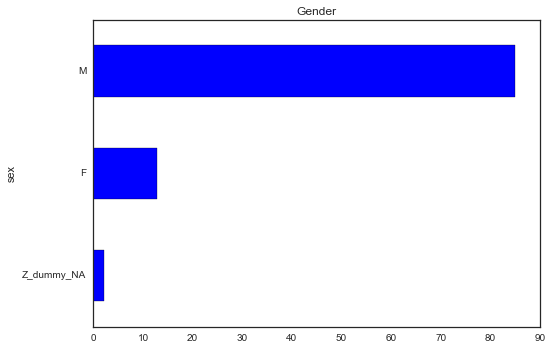

In [26]:
# mostly male (males 0, females 1)
gender = df_all.groupby('sex').size().sort_values(ascending = True)/df_all.shape[0]*100
gender.plot(kind='barh', title = 'Gender')
plt.show()

In [27]:
df_all.head()

,age,sex,region,nregions,memtype,memmonths,mem_mag1,mem_mag2,hasemail,r1,r2,r3,r.quick,extra,intl,r.intl,allgames1yr,allgames5yr,fastevents,medevents,slowevents,nfloor,age.na,r1.na,r2.na,r3.na,r.quick.na,r.intl.na,mon_less30,mon_31,mon_32,mon_33,mon_34,mon_35,mon_36,mon_37_60,mon_61_84,mon_85_120,mon_121_263,mon_264_plus,games_0,games_1_5,games_6_10,games_11_20,games_21_34,games_35_49,games_50_plus,agesq,agecbd,allgames1yrsq,allgames1yrcbd,allgames5yrsq,allgames5yrcbd,memmonthssq,memmonthscbd
0,11.00,M,0.12,1,N,19,N,N,N,1942.12,1811.61,1557.56,2007.74,N,N,3477.56,0,0,0,0,0,0,0,1,1,1,1,1,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,4.97,7.45,0.00,0.00,0.00,0.00,5.99,8.99
1,61.00,M,0.12,1,N,198,Y,N,Y,2178.00,2215.00,2291.00,2932.00,Y,N,3477.56,4,29,1,0,10,0,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,8.25,12.38,3.22,4.83,6.80,10.20,10.59,15.88
2,16.00,F,0.12,1,N,192,N,N,Y,627.00,628.00,1362.00,2007.00,N,N,3477.56,29,29,0,4,1,0,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,5.67,8.50,6.80,10.20,6.80,10.20,10.53,15.79
3,47.00,M,0.12,1,N,268,Y,N,Y,2600.00,2601.00,2602.00,2007.74,N,N,3477.56,0,0,0,0,0,0,0,0,0,0,1,1,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,True,7.74,11.61,0.00,0.00,0.00,0.00,11.19,16.78
4,11.00,F,0.12,1,N,101,N,N,N,464.00,466.00,958.00,1356.00,N,N,3477.56,12,35,0,8,0,0,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,4.97,7.45,5.13,7.69,7.17,10.75,9.25,13.87


In [28]:
df_all.dtypes

age               float64
sex                object
region            float64
nregions            int64
memtype            object
memmonths           int64
mem_mag1           object
mem_mag2           object
hasemail           object
r1                float64
r2                float64
r3                float64
r.quick           float64
extra              object
intl               object
r.intl            float64
allgames1yr         int64
allgames5yr         int64
fastevents          int64
medevents           int64
slowevents          int64
nfloor              int64
age.na              int64
r1.na               int64
r2.na               int64
r3.na               int64
r.quick.na          int64
r.intl.na           int64
mon_less30           bool
mon_31               bool
mon_32               bool
mon_33               bool
mon_34               bool
mon_35               bool
mon_36               bool
mon_37_60            bool
mon_61_84            bool
mon_85_120           bool
mon_121_263 

In [29]:
df_all['sex']

0                 M
1                 M
2                 F
3                 M
4                 F
5                 F
6                 M
7                 M
8                 M
9                 M
10                M
11                M
12                M
13                M
14                M
15                F
16                M
17                M
18                F
19                M
20                M
21                F
22                M
23                M
24                M
25                M
26                M
27                M
28                F
29                M
30                M
31                M
32                M
33                F
34                M
35                M
36                M
37                M
38                M
39                F
40                M
41                M
42                M
43                F
44                M
45                M
46                M
47                M
48                M
49                M


In [30]:
df_all.sex = (df_all.sex.values=='F')*1

In [31]:
df_all.head()

,age,sex,region,nregions,memtype,memmonths,mem_mag1,mem_mag2,hasemail,r1,r2,r3,r.quick,extra,intl,r.intl,allgames1yr,allgames5yr,fastevents,medevents,slowevents,nfloor,age.na,r1.na,r2.na,r3.na,r.quick.na,r.intl.na,mon_less30,mon_31,mon_32,mon_33,mon_34,mon_35,mon_36,mon_37_60,mon_61_84,mon_85_120,mon_121_263,mon_264_plus,games_0,games_1_5,games_6_10,games_11_20,games_21_34,games_35_49,games_50_plus,agesq,agecbd,allgames1yrsq,allgames1yrcbd,allgames5yrsq,allgames5yrcbd,memmonthssq,memmonthscbd
0,11.00,0,0.12,1,N,19,N,N,N,1942.12,1811.61,1557.56,2007.74,N,N,3477.56,0,0,0,0,0,0,0,1,1,1,1,1,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,4.97,7.45,0.00,0.00,0.00,0.00,5.99,8.99
1,61.00,0,0.12,1,N,198,Y,N,Y,2178.00,2215.00,2291.00,2932.00,Y,N,3477.56,4,29,1,0,10,0,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,8.25,12.38,3.22,4.83,6.80,10.20,10.59,15.88
2,16.00,1,0.12,1,N,192,N,N,Y,627.00,628.00,1362.00,2007.00,N,N,3477.56,29,29,0,4,1,0,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,5.67,8.50,6.80,10.20,6.80,10.20,10.53,15.79
3,47.00,0,0.12,1,N,268,Y,N,Y,2600.00,2601.00,2602.00,2007.74,N,N,3477.56,0,0,0,0,0,0,0,0,0,0,1,1,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,True,7.74,11.61,0.00,0.00,0.00,0.00,11.19,16.78
4,11.00,1,0.12,1,N,101,N,N,N,464.00,466.00,958.00,1356.00,N,N,3477.56,12,35,0,8,0,0,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,4.97,7.45,5.13,7.69,7.17,10.75,9.25,13.87


### memtype
- make Normal the reference category
- memtypeA=1 for affiliate
- memtypeF=1 for family

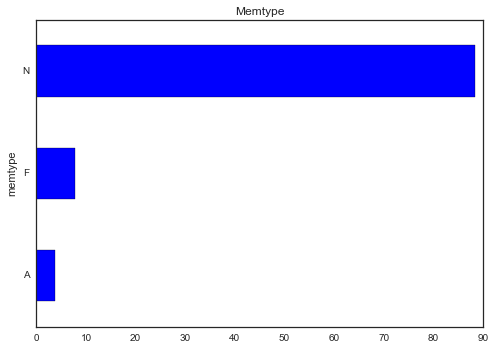

In [32]:
# membership types A, F, N 
memtype = df_all.groupby('memtype').size().sort_values(ascending = True)/df_all.shape[0]*100
memtype.plot(kind='barh', title = 'Memtype')
plt.show()

In [33]:
df_all['memtypeA'] = (df_all.memtype=='A')*1

In [34]:
df_all['memtypeF'] = (df_all.memtype=='F')*1

In [35]:
df_all = df_all.drop('memtype', axis=1)

### mem_mag1 & mem_mag2 & hasemail

- only yes or no... convert yes to 1, no to 0

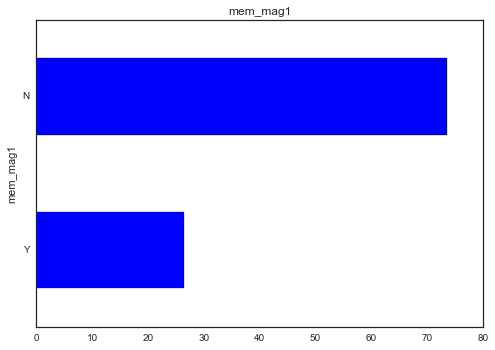

In [36]:
memmag1 = df_all.groupby('mem_mag1').size().sort_values(ascending = True)/df_all.shape[0]*100
memmag1.plot(kind='barh', title = 'mem_mag1')
plt.show()

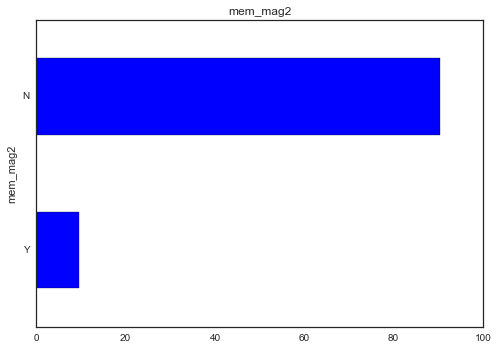

In [37]:
memmag2 = df_all.groupby('mem_mag2').size().sort_values(ascending = True)/df_all.shape[0]*100
memmag2.plot(kind='barh', title = 'mem_mag2')
plt.show()

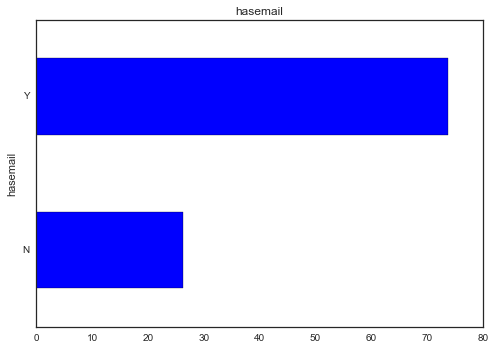

In [38]:
hasemail = df_all.groupby('hasemail').size().sort_values(ascending = True)/df_all.shape[0]*100
hasemail.plot(kind='barh', title = 'hasemail')
plt.show()

In [39]:
df_all.mem_mag1 = (df_all.mem_mag1.values=='Y')*1
df_all.mem_mag2 = (df_all.mem_mag2.values=='Y')*1

In [40]:
df_all.hasemail = (df_all.hasemail.values=='Y')*1

In [41]:
df_all.head()

,age,sex,region,nregions,memmonths,mem_mag1,mem_mag2,hasemail,r1,r2,r3,r.quick,extra,intl,r.intl,allgames1yr,allgames5yr,fastevents,medevents,slowevents,nfloor,age.na,r1.na,r2.na,r3.na,r.quick.na,r.intl.na,mon_less30,mon_31,mon_32,mon_33,mon_34,mon_35,mon_36,mon_37_60,mon_61_84,mon_85_120,mon_121_263,mon_264_plus,games_0,games_1_5,games_6_10,games_11_20,games_21_34,games_35_49,games_50_plus,agesq,agecbd,allgames1yrsq,allgames1yrcbd,allgames5yrsq,allgames5yrcbd,memmonthssq,memmonthscbd,memtypeA,memtypeF
0,11.00,0,0.12,1,19,0,0,0,1942.12,1811.61,1557.56,2007.74,N,N,3477.56,0,0,0,0,0,0,0,1,1,1,1,1,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,4.97,7.45,0.00,0.00,0.00,0.00,5.99,8.99,0,0
1,61.00,0,0.12,1,198,1,0,1,2178.00,2215.00,2291.00,2932.00,Y,N,3477.56,4,29,1,0,10,0,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,8.25,12.38,3.22,4.83,6.80,10.20,10.59,15.88,0,0
2,16.00,1,0.12,1,192,0,0,1,627.00,628.00,1362.00,2007.00,N,N,3477.56,29,29,0,4,1,0,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,5.67,8.50,6.80,10.20,6.80,10.20,10.53,15.79,0,0
3,47.00,0,0.12,1,268,1,0,1,2600.00,2601.00,2602.00,2007.74,N,N,3477.56,0,0,0,0,0,0,0,0,0,0,1,1,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,True,7.74,11.61,0.00,0.00,0.00,0.00,11.19,16.78,0,0
4,11.00,1,0.12,1,101,0,0,0,464.00,466.00,958.00,1356.00,N,N,3477.56,12,35,0,8,0,0,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,4.97,7.45,5.13,7.69,7.17,10.75,9.25,13.87,0,0


### extra, intl

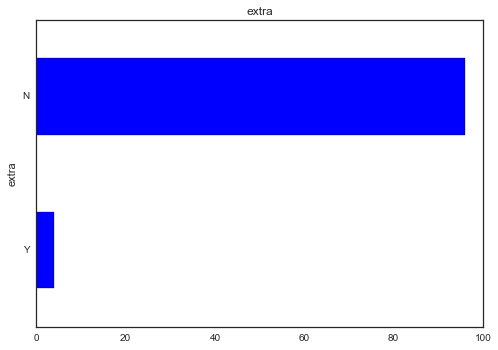

In [42]:
extra = df_all.groupby('extra').size().sort_values(ascending = True)/df_all.shape[0]*100
extra.plot(kind='barh', title = 'extra')
plt.show()

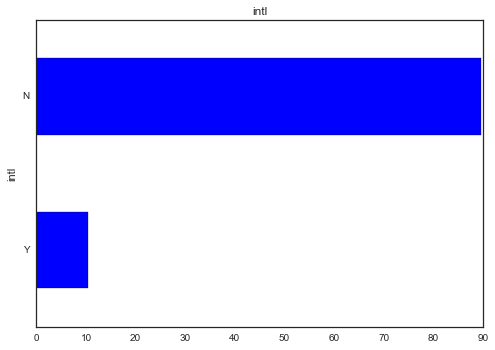

In [43]:
intl = df_all.groupby('intl').size().sort_values(ascending = True)/df_all.shape[0]*100
intl.plot(kind='barh', title = 'intl')
plt.show()

In [44]:
df_all.extra = (df_all.extra.values=='Y')*1
df_all.intl = (df_all.intl.values=='Y')*1

In [45]:
df_all.head()

,age,sex,region,nregions,memmonths,mem_mag1,mem_mag2,hasemail,r1,r2,r3,r.quick,extra,intl,r.intl,allgames1yr,allgames5yr,fastevents,medevents,slowevents,nfloor,age.na,r1.na,r2.na,r3.na,r.quick.na,r.intl.na,mon_less30,mon_31,mon_32,mon_33,mon_34,mon_35,mon_36,mon_37_60,mon_61_84,mon_85_120,mon_121_263,mon_264_plus,games_0,games_1_5,games_6_10,games_11_20,games_21_34,games_35_49,games_50_plus,agesq,agecbd,allgames1yrsq,allgames1yrcbd,allgames5yrsq,allgames5yrcbd,memmonthssq,memmonthscbd,memtypeA,memtypeF
0,11.00,0,0.12,1,19,0,0,0,1942.12,1811.61,1557.56,2007.74,0,0,3477.56,0,0,0,0,0,0,0,1,1,1,1,1,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,4.97,7.45,0.00,0.00,0.00,0.00,5.99,8.99,0,0
1,61.00,0,0.12,1,198,1,0,1,2178.00,2215.00,2291.00,2932.00,1,0,3477.56,4,29,1,0,10,0,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,8.25,12.38,3.22,4.83,6.80,10.20,10.59,15.88,0,0
2,16.00,1,0.12,1,192,0,0,1,627.00,628.00,1362.00,2007.00,0,0,3477.56,29,29,0,4,1,0,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,5.67,8.50,6.80,10.20,6.80,10.20,10.53,15.79,0,0
3,47.00,0,0.12,1,268,1,0,1,2600.00,2601.00,2602.00,2007.74,0,0,3477.56,0,0,0,0,0,0,0,0,0,0,1,1,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,True,7.74,11.61,0.00,0.00,0.00,0.00,11.19,16.78,0,0
4,11.00,1,0.12,1,101,0,0,0,464.00,466.00,958.00,1356.00,0,0,3477.56,12,35,0,8,0,0,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,4.97,7.45,5.13,7.69,7.17,10.75,9.25,13.87,0,0


# Feature Engineering

#### % change in chess rankings

In [46]:
df_all['r3r2'] = df_all.r3 / df_all.r2 -1

In [47]:
df_all['r3r1'] = df_all.r3 / df_all.r1 -1

In [48]:
df_all['allgames_change'] = df_all.allgames1yr/((df_all.allgames5yr - df_all.allgames1yr + 1)/4)-1

In [49]:
df_all['fastevets_prop'] = df_all.fastevents / (df_all.fastevents + df_all.medevents + df_all.slowevents+0.01)

In [50]:
df_all['medevents_prop'] = df_all.medevents / (df_all.fastevents + df_all.medevents + df_all.slowevents+0.01)

In [51]:
df_all['slowevents_prop'] = df_all.slowevents / (df_all.fastevents + df_all.medevents + df_all.slowevents+0.01)

In [52]:
# TODO region is discrete?? 
# last 8 are sq and cubed terms 
STANDARDIZE = ['age', 'region', 'nregions', 'memmonths', 'r1', 'r2', 'r3', 'r.quick', 'r.intl', 
               'allgames1yr', 'allgames5yr', 'fastevents', 'medevents', 'slowevents', 'nfloor', 
              'agesq', 'agecbd', 'allgames1yrsq', 'allgames1yrcbd', 'allgames5yrsq', 'allgames5yrcbd', 'memmonthssq', 
               'memmonthscbd', 'r3r2', 'r3r1', 'allgames_change', 'fastevets_prop', 'medevents_prop', 'slowevents_prop']


INDICATORS = ['sex', 'mem_mag1', 'mem_mag2', 'hasemail', 'extra', 'intl', 'age.na', 'r1.na', 'r2.na', 
             'r3.na', 'r.quick.na', 'r.intl.na', 'mon_less30', 'mon_31', 'mon_32', 'mon_33', 'mon_34', 
             'mon_35', 'mon_36', 'mon_37_60', 'mon_61_84', 'mon_85_120', 'mon_121_263', 'mon_264_plus', 
             'games_0', 'games_1_5', 'games_6_10', 'games_11_20', 'games_21_34', 'games_35_49', 'games_50_plus', 
             'memtypeA', 'memtypeF']

In [53]:
len(STANDARDIZE) + len(INDICATORS)

62

In [54]:
df_all.shape[1]

62

## Model Stacking

In [55]:
ms_train_x = pd.read_csv('data/fromKen/stacking/trainX.csv')
# ms_train_y = pd.read_csv('data/fromKen/stacking/trainY.csv')
ms_test_x = pd.read_csv('data/fromKen/stacking/testX.csv')

In [57]:
print ms_train_x.shape
print ms_train_y.shape
print ms_test_x.shape

(43436, 9)
(43436, 1)
(14479, 9)


In [58]:
ms_train_x.head()

,glmpreds,gampreds,rf1preds,rf2preds,nn1preds,nn2preds,gbpolypreds,svmpreds,knnpreds
0,0.94,0.94,1.00,1.00,0.95,0.95,0.94,0.78,0.92
1,0.44,0.42,0.46,0.44,0.41,0.37,0.19,0.34,0.48
2,0.54,0.55,0.65,0.66,0.63,0.57,0.77,0.71,0.72
3,0.54,0.54,0.39,0.36,0.47,0.40,0.48,0.41,0.40
4,0.89,0.88,0.83,0.83,0.83,0.85,0.82,0.82,0.68


In [66]:
ms_train_x.columns

Index([u'glmpreds', u'gampreds', u'rf1preds', u'rf2preds', u'nn1preds', u'nn2preds', u'gbpolypreds', u'svmpreds', u'knnpreds'], dtype='object')

In [65]:
ms_test_x.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9
0,0.82,0.81,0.81,0.81,0.86,0.87,0.84,0.78,0.74
1,0.59,0.61,0.65,0.64,0.78,0.79,0.67,0.65,0.52
2,0.85,0.85,0.77,0.79,0.85,0.85,0.82,0.78,0.64
3,0.60,0.61,0.40,0.45,0.59,0.57,0.57,0.70,0.50
4,0.86,0.87,0.83,0.83,0.88,0.88,0.90,0.84,0.82


In [67]:
ms_test_x.columns

Index([u'V1', u'V2', u'V3', u'V4', u'V5', u'V6', u'V7', u'V8', u'V9'], dtype='object')

Kendrick Lo [11:44 PM] 
hey… i think i’d like to pick some features that are commonly in the top for the random forest as opposed to just sticking them all back in… otherwise i think the other stuff will just drown out our stacked predictions

[11:48] 
how about this then… maybe i will give you the file with the predictions..  you can run that on its own through GBM and then do a second run with those and all yours in the RF

[11:48] 
then we will cover both basis

[11:48] 
i’ll use top 5 from my models in my RF



I think the column in the responses has to be renamed to “lapsed"

[1:56] 
Also, the test set’s columns names need to be changed to the same column names as the training set


In [69]:
ms_test_x.rename(columns={'V1': 'glmpreds', 'V2': 'gampreds', 'V3': 'rf1preds', 'V4': 'rf2preds', 'V5': 'nn1preds', 
                         'V6': 'nn2preds', 'V7': 'gbpolypreds', 'V8': 'svmpreds', 'V9': 'knnpreds'}, inplace=True)

In [70]:
ms_test_x.head()

,glmpreds,gampreds,rf1preds,rf2preds,nn1preds,nn2preds,gbpolypreds,svmpreds,knnpreds
0,0.82,0.81,0.81,0.81,0.86,0.87,0.84,0.78,0.74
1,0.59,0.61,0.65,0.64,0.78,0.79,0.67,0.65,0.52
2,0.85,0.85,0.77,0.79,0.85,0.85,0.82,0.78,0.64
3,0.60,0.61,0.40,0.45,0.59,0.57,0.57,0.70,0.50
4,0.86,0.87,0.83,0.83,0.88,0.88,0.90,0.84,0.82


In [72]:
df_all_stacking = pd.concat([ms_train_x, ms_test_x], axis=0)

In [73]:
df_all_stacking.shape

(57915, 9)

In [74]:
df_all.shape

(57915, 62)

In [77]:
df_all = pd.concat([df_all_stacking, df_all], axis=1)

In [78]:
df_all.shape

(57915, 71)

## Utility Functions

In [ ]:
# Females
importance_list = clfForest.feature_importances_
name_list = all_features
importance_list, name_list = zip(*sorted(zip(importance_list, name_list)))
# just get top (in reverse order)
top_imp = importance_list[-20:]
top_names = name_list[-20:]
plt.barh(range(len(top_names)),top_imp,align='center')
plt.yticks(range(len(top_names)),top_names)
plt.xlabel('Relative Importance in the Random Forest')
plt.ylabel('Features')
plt.title('Relative importance of Top 20 Features for Females')
plt.show()

# Modeling

In [58]:
track_dict = {}

- df_all
- df_all_stacking
- test_idx
- train_y
- test_ids

## Gradient Boosting Trees

#### All Features

In [81]:
# parameters
estimators = [250, 500, 1000] # default = 10
features = [0.6, 0.75, 0.9] # default = 'sqrt'
samples = [25, 35, 45] # default = 1
max_depth = [3, 5, 10]

for e in estimators:
    for f in features: 
        for s in samples: 
            for d in max_depth: 
                modelboost = GradientBoostingClassifier(n_estimators=e, max_features=f, min_samples_leaf=s, 
                                                   max_depth=d, random_state=1004)
                p2.get_pred_np(modelboost, df_all, train_y, 'RFBoost', track_dict=None, 
                            test_idx=test_idx, train_size=0.8, columns=None, parameters=None, 
                            score_func='log_loss', predict=False)


# option to save fitted model
# joblib.dump(model, 'models/baseline_logistic.pkl')

############
GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=0.6, max_leaf_nodes=None,
              min_samples_leaf=25, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=250,
              presort='auto', random_state=1004, subsample=1.0, verbose=0,
              warm_start=False)
----------
Training set error = 0.51194
Test set error = 0.53270
----------
############
############
GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=5, max_features=0.6, max_leaf_nodes=None,
              min_samples_leaf=25, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=250,
              presort='auto', random_state=1004, subsample=1.0, verbose=0,
              warm_start=False)
----------
Training set error = 0.46368
Test set error = 0.53794
----------
############
############
GradientBoostingClassifier(init=None, learning_rate=0

KeyboardInterrupt: 

In [ ]:
GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=5, max_features=0.75, max_leaf_nodes=None,
              min_samples_leaf=45, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=250,
              presort='auto', random_state=1004, subsample=1.0, verbose=0,
              warm_start=False)
----------
Training set error = 0.47288
Test set error = 0.52702
----------
############
############

GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=0.6, max_leaf_nodes=None,
              min_samples_leaf=35, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              presort='auto', random_state=1004, subsample=1.0, verbose=0,
              warm_start=False)
----------
Training set error = 0.49645
Test set error = 0.52902
----------
############
############

GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=0.75, max_leaf_nodes=None,
              min_samples_leaf=25, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              presort='auto', random_state=1004, subsample=1.0, verbose=0,
              warm_start=False)
----------
Training set error = 0.49462
Test set error = 0.53076


GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=0.9, max_leaf_nodes=None,
              min_samples_leaf=25, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=250,
              presort='auto', random_state=1004, subsample=1.0, verbose=0,
              warm_start=False)
----------
Training set error = 0.51255
Test set error = 0.53081
----------
############
############

In [83]:
full_model = GradientBoostingClassifier(n_estimators=500, max_features=0.6, min_samples_leaf=35, max_depth=3, 
                                        random_state=1004)

In [84]:
df_all.shape

(57915, 71)

In [85]:
pred_full = p2.fit_and_predict(full_model, df_all, train_y, test_idx)

In [86]:
pred_full.shape

(14479,)

In [87]:
log_loss(train_y, full_model.predict_proba(df_all[:test_idx])[:, 1])
# validation 0.52902
# Kaggle 0.53114

0.50070699982853328

In [89]:
p2.write_to_file('predictions/stacking_gbx_all_features.csv', pred_full, test_ids)

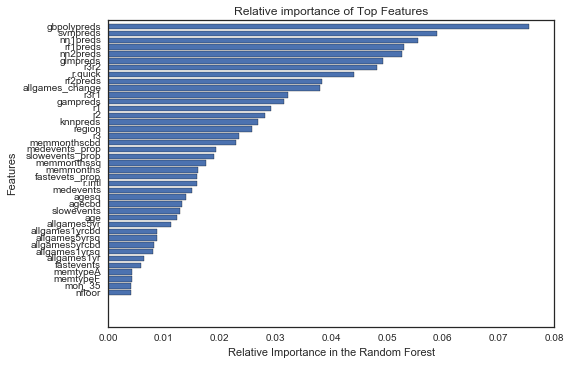

In [117]:
importance_list = full_model.feature_importances_
name_list = df_all.columns
importance_list, name_list = zip(*sorted(zip(importance_list, name_list)))
# just get top (in reverse order)
top_imp = importance_list[-40:]
top_names = name_list[-40:]
plt.barh(range(len(top_names)),top_imp,align='center')
plt.yticks(range(len(top_names)),top_names)
plt.xlabel('Relative Importance in the Random Forest')
plt.ylabel('Features')
plt.title('Relative importance of Top Features')
plt.show()

In [120]:
top_names

('nfloor',
 'mon_35',
 'memtypeF',
 'memtypeA',
 'fastevents',
 'allgames1yr',
 'allgames1yrsq',
 'allgames5yrcbd',
 'allgames5yrsq',
 'allgames1yrcbd',
 'allgames5yr',
 'age',
 'slowevents',
 'agecbd',
 'agesq',
 'medevents',
 'r.intl',
 'fastevets_prop',
 'memmonths',
 'memmonthssq',
 'slowevents_prop',
 'medevents_prop',
 'memmonthscbd',
 'r3',
 'region',
 'knnpreds',
 'r2',
 'r1',
 'gampreds',
 'r3r1',
 'allgames_change',
 'rf2preds',
 'r.quick',
 'r3r2',
 'glmpreds',
 'nn2preds',
 'rf1preds',
 'nn1preds',
 'svmpreds',
 'gbpolypreds')

#### Model Only

In [97]:
# parameters
estimators = [100, 250, 500] # default = 10
features = [0.6, 0.75, 0.9] # default = 'sqrt'
samples = [25, 35, 45] # default = 1
max_depth = [3, 4, 5]

for e in estimators:
    for f in features: 
        for s in samples: 
            for d in max_depth: 
                modelboost = GradientBoostingClassifier(n_estimators=e, max_features=f, min_samples_leaf=s, 
                                                   max_depth=d, random_state=1004)
                p2.get_pred_np(modelboost, df_all_stacking, train_y, 'RFBoost', track_dict=None, 
                            test_idx=test_idx, train_size=0.8, columns=None, parameters=None, 
                            score_func='log_loss', predict=False)

############
GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=0.6, max_leaf_nodes=None,
              min_samples_leaf=25, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=1004, subsample=1.0, verbose=0,
              warm_start=False)
----------
Training set error = 0.52441
Test set error = 0.53666
----------
############
############
GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=4, max_features=0.6, max_leaf_nodes=None,
              min_samples_leaf=25, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=1004, subsample=1.0, verbose=0,
              warm_start=False)
----------
Training set error = 0.51678
Test set error = 0.54090
----------
############
############
GradientBoostingClassifier(init=None, learning_rate=0

In [ ]:
GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=4, max_features=0.6, max_leaf_nodes=None,
              min_samples_leaf=25, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=1004, subsample=1.0, verbose=0,
              warm_start=False)
----------
Training set error = 0.52050
Test set error = 0.52144

In [91]:
model_stacked2 = GradientBoostingClassifier(n_estimators=100, max_features=0.6, min_samples_leaf=25, max_depth=4, 
                                        random_state=1004)

In [92]:
pred_stacked = p2.fit_and_predict(model_stacked2, df_all_stacking, train_y, test_idx)

In [93]:
pred_stacked.shape

(14479,)

In [95]:
log_loss(train_y, model_stacked2.predict_proba(df_all_stacking[:test_idx])[:, 1])
# validation 0.52144
# Kaggle 0.53081

0.52011249123484482

In [161]:
df_all_stacking.shape

(57915, 9)

In [96]:
p2.write_to_file('predictions/stacking_gbx_no_features.csv', pred_stacked, test_ids)

In [156]:
model_stacked2

GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=4, max_features=0.6, max_leaf_nodes=None,
              min_samples_leaf=25, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=1004, subsample=1.0, verbose=0,
              warm_start=False)

In [158]:
gbx_2nd_order_predict = p2.half_half(model_stacked2, df_all_stacking, train_y,  test_idx=test_idx)

In [160]:
gbx_2nd_order_predict.shape

(43436,)

In [159]:
log_loss(train_y, gbx_2nd_order_predict)

0.53725531639596846

In [162]:
predictions = pd.DataFrame({'lapsed': gbx_2nd_order_predict})

# write to csv, with header, drop index
predictions.to_csv('predictions/train_predictions/gbx_2nd_order.csv', header=True, index=False)

### TODO try with just Ken's features and not my features added in from before (that's when I had best GBX)

In [106]:
df_all_subset = df_all.drop('r3r2', axis=1)

In [107]:
df_all_subset = df_all_subset.drop('r3r1', axis=1)

In [108]:
df_all_subset = df_all_subset.drop('allgames_change', axis=1)

In [109]:
df_all_subset = df_all_subset.drop('fastevets_prop', axis=1)

In [110]:
df_all_subset = df_all_subset.drop('medevents_prop', axis=1)

In [111]:
df_all_subset = df_all_subset.drop('slowevents_prop', axis=1)

In [112]:
df_all_subset.shape

(57915, 65)

In [113]:
df_all_subset.head()

,glmpreds,gampreds,rf1preds,rf2preds,nn1preds,nn2preds,gbpolypreds,svmpreds,knnpreds,age,sex,region,nregions,memmonths,mem_mag1,mem_mag2,hasemail,r1,r2,r3,r.quick,extra,intl,r.intl,allgames1yr,allgames5yr,fastevents,medevents,slowevents,nfloor,age.na,r1.na,r2.na,r3.na,r.quick.na,r.intl.na,mon_less30,mon_31,mon_32,mon_33,mon_34,mon_35,mon_36,mon_37_60,mon_61_84,mon_85_120,mon_121_263,mon_264_plus,games_0,games_1_5,games_6_10,games_11_20,games_21_34,games_35_49,games_50_plus,agesq,agecbd,allgames1yrsq,allgames1yrcbd,allgames5yrsq,allgames5yrcbd,memmonthssq,memmonthscbd,memtypeA,memtypeF
0,0.94,0.94,1.00,1.00,0.95,0.95,0.94,0.78,0.92,11.00,0,0.12,1,19,0,0,0,1942.12,1811.61,1557.56,2007.74,0,0,3477.56,0,0,0,0,0,0,0,1,1,1,1,1,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,4.97,7.45,0.00,0.00,0.00,0.00,5.99,8.99,0,0
1,0.44,0.42,0.46,0.44,0.41,0.37,0.19,0.34,0.48,61.00,0,0.12,1,198,1,0,1,2178.00,2215.00,2291.00,2932.00,1,0,3477.56,4,29,1,0,10,0,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,8.25,12.38,3.22,4.83,6.80,10.20,10.59,15.88,0,0
2,0.54,0.55,0.65,0.66,0.63,0.57,0.77,0.71,0.72,16.00,1,0.12,1,192,0,0,1,627.00,628.00,1362.00,2007.00,0,0,3477.56,29,29,0,4,1,0,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,5.67,8.50,6.80,10.20,6.80,10.20,10.53,15.79,0,0
3,0.54,0.54,0.39,0.36,0.47,0.40,0.48,0.41,0.40,47.00,0,0.12,1,268,1,0,1,2600.00,2601.00,2602.00,2007.74,0,0,3477.56,0,0,0,0,0,0,0,0,0,0,1,1,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,True,7.74,11.61,0.00,0.00,0.00,0.00,11.19,16.78,0,0
4,0.89,0.88,0.83,0.83,0.83,0.85,0.82,0.82,0.68,11.00,1,0.12,1,101,0,0,0,464.00,466.00,958.00,1356.00,0,0,3477.56,12,35,0,8,0,0,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,4.97,7.45,5.13,7.69,7.17,10.75,9.25,13.87,0,0


In [122]:
# parameters
estimators = [100, 250, 500] # default = 10
features = [0.6, 0.75, 0.9] # default = 'sqrt'
samples = [25, 35, 45] # default = 1
max_depth = [3, 4, 5]

for e in estimators:
    for f in features: 
        for s in samples: 
            for d in max_depth: 
                model_subset = GradientBoostingClassifier(n_estimators=e, max_features=f, min_samples_leaf=s, 
                                                   max_depth=d, random_state=1004)
                p2.get_pred_np(model_subset, df_all_subset, train_y, 'RFBoost', track_dict=None, 
                            test_idx=test_idx, train_size=0.8, columns=None, parameters=None, 
                            score_func='log_loss', predict=False)


############
GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=0.6, max_leaf_nodes=None,
              min_samples_leaf=25, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=1004, subsample=1.0, verbose=0,
              warm_start=False)
----------
Training set error = 0.52455
Test set error = 0.53356
----------
############
############
GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=4, max_features=0.6, max_leaf_nodes=None,
              min_samples_leaf=25, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=1004, subsample=1.0, verbose=0,
              warm_start=False)
----------
Training set error = 0.51644
Test set error = 0.53191
----------
############
############
GradientBoostingClassifier(init=None, learning_rate=0

In [ ]:
GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=0.6, max_leaf_nodes=None,
              min_samples_leaf=45, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=250,
              presort='auto', random_state=1004, subsample=1.0, verbose=0,
              warm_start=False)
----------
Training set error = 0.51393
Test set error = 0.52784


GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=5, max_features=0.75, max_leaf_nodes=None,
              min_samples_leaf=45, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=1004, subsample=1.0, verbose=0,
              warm_start=False)
----------
Training set error = 0.50700
Test set error = 0.52677

### TODO try one with just the most important features instead of all features? 

In [121]:
top_names

('nfloor',
 'mon_35',
 'memtypeF',
 'memtypeA',
 'fastevents',
 'allgames1yr',
 'allgames1yrsq',
 'allgames5yrcbd',
 'allgames5yrsq',
 'allgames1yrcbd',
 'allgames5yr',
 'age',
 'slowevents',
 'agecbd',
 'agesq',
 'medevents',
 'r.intl',
 'fastevets_prop',
 'memmonths',
 'memmonthssq',
 'slowevents_prop',
 'medevents_prop',
 'memmonthscbd',
 'r3',
 'region',
 'knnpreds',
 'r2',
 'r1',
 'gampreds',
 'r3r1',
 'allgames_change',
 'rf2preds',
 'r.quick',
 'r3r2',
 'glmpreds',
 'nn2preds',
 'rf1preds',
 'nn1preds',
 'svmpreds',
 'gbpolypreds')

In [125]:
len(top_names[-20:])

20

In [131]:
df_all.head()

,glmpreds,gampreds,rf1preds,rf2preds,nn1preds,nn2preds,gbpolypreds,svmpreds,knnpreds,age,sex,region,nregions,memmonths,mem_mag1,mem_mag2,hasemail,r1,r2,r3,r.quick,extra,intl,r.intl,allgames1yr,allgames5yr,fastevents,medevents,slowevents,nfloor,age.na,r1.na,r2.na,r3.na,r.quick.na,r.intl.na,mon_less30,mon_31,mon_32,mon_33,mon_34,mon_35,mon_36,mon_37_60,mon_61_84,mon_85_120,mon_121_263,mon_264_plus,games_0,games_1_5,games_6_10,games_11_20,games_21_34,games_35_49,games_50_plus,agesq,agecbd,allgames1yrsq,allgames1yrcbd,allgames5yrsq,allgames5yrcbd,memmonthssq,memmonthscbd,memtypeA,memtypeF,r3r2,r3r1,allgames_change,fastevets_prop,medevents_prop,slowevents_prop
0,0.94,0.94,1.00,1.00,0.95,0.95,0.94,0.78,0.92,11.00,0,0.12,1,19,0,0,0,1942.12,1811.61,1557.56,2007.74,0,0,3477.56,0,0,0,0,0,0,0,1,1,1,1,1,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,4.97,7.45,0.00,0.00,0.00,0.00,5.99,8.99,0,0,-0.14,-0.20,-1.00,0.00,0.00,0.00
1,0.44,0.42,0.46,0.44,0.41,0.37,0.19,0.34,0.48,61.00,0,0.12,1,198,1,0,1,2178.00,2215.00,2291.00,2932.00,1,0,3477.56,4,29,1,0,10,0,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,8.25,12.38,3.22,4.83,6.80,10.20,10.59,15.88,0,0,0.03,0.05,-0.38,0.09,0.00,0.91
2,0.54,0.55,0.65,0.66,0.63,0.57,0.77,0.71,0.72,16.00,1,0.12,1,192,0,0,1,627.00,628.00,1362.00,2007.00,0,0,3477.56,29,29,0,4,1,0,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,5.67,8.50,6.80,10.20,6.80,10.20,10.53,15.79,0,0,1.17,1.17,115.00,0.00,0.80,0.20
3,0.54,0.54,0.39,0.36,0.47,0.40,0.48,0.41,0.40,47.00,0,0.12,1,268,1,0,1,2600.00,2601.00,2602.00,2007.74,0,0,3477.56,0,0,0,0,0,0,0,0,0,0,1,1,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,True,7.74,11.61,0.00,0.00,0.00,0.00,11.19,16.78,0,0,0.00,0.00,-1.00,0.00,0.00,0.00
4,0.89,0.88,0.83,0.83,0.83,0.85,0.82,0.82,0.68,11.00,1,0.12,1,101,0,0,0,464.00,466.00,958.00,1356.00,0,0,3477.56,12,35,0,8,0,0,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,4.97,7.45,5.13,7.69,7.17,10.75,9.25,13.87,0,0,1.06,1.06,1.00,0.00,1.00,0.00


In [134]:
df_all[['glmpreds', 'gampreds']]

,glmpreds,gampreds
0,0.94,0.94
1,0.44,0.42
2,0.54,0.55
3,0.54,0.54
4,0.89,0.88
5,0.79,0.78
6,0.33,0.34
7,0.81,0.77
8,0.43,0.43
9,0.25,0.22


In [136]:
list(top_names[-20:])

['slowevents_prop',
 'medevents_prop',
 'memmonthscbd',
 'r3',
 'region',
 'knnpreds',
 'r2',
 'r1',
 'gampreds',
 'r3r1',
 'allgames_change',
 'rf2preds',
 'r.quick',
 'r3r2',
 'glmpreds',
 'nn2preds',
 'rf1preds',
 'nn1preds',
 'svmpreds',
 'gbpolypreds']

In [141]:
df_all_top = df_all[list(top_names[-20:])]

In [142]:
# parameters
estimators = [100, 250, 500] # default = 10
features = [0.6, 0.75, 0.9] # default = 'sqrt'
samples = [25, 35, 45] # default = 1
max_depth = [3, 4, 5]

for e in estimators:
    for f in features: 
        for s in samples: 
            for d in max_depth: 
                model_top = GradientBoostingClassifier(n_estimators=e, max_features=f, min_samples_leaf=s, 
                                                   max_depth=d, random_state=1004)
                p2.get_pred_np(model_top, df_all_top, train_y, 'RFBoost', track_dict=None, 
                            test_idx=test_idx, train_size=0.8, columns=None, parameters=None, 
                            score_func='log_loss', predict=False)


############
GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=0.6, max_leaf_nodes=None,
              min_samples_leaf=25, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=1004, subsample=1.0, verbose=0,
              warm_start=False)
----------
Training set error = 0.52640
Test set error = 0.52531
----------
############
############
GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=4, max_features=0.6, max_leaf_nodes=None,
              min_samples_leaf=25, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=1004, subsample=1.0, verbose=0,
              warm_start=False)
----------
Training set error = 0.51602
Test set error = 0.53300
----------
############
############
GradientBoostingClassifier(init=None, learning_rate=0

In [ ]:

############
GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=0.6, max_leaf_nodes=None,
              min_samples_leaf=25, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=1004, subsample=1.0, verbose=0,
              warm_start=False)
----------
Training set error = 0.52640
Test set error = 0.52531

In [152]:
model_stacked20 = GradientBoostingClassifier(n_estimators=100, max_features=0.6, min_samples_leaf=25, max_depth=3,
                                             random_state=1004)

In [153]:
pred_stacked20 = p2.fit_and_predict(model_stacked20, df_all_top, train_y, test_idx)

In [154]:
pred_stacked20.shape

(14479,)

In [155]:
log_loss(train_y, model_stacked20.predict_proba(df_all_top[:test_idx])[:, 1])

0.52548636549050265

In [151]:
p2.write_to_file('predictions/stacking_gbx_top20.csv', pred_stacked20, test_ids)

# actual 0.47586477423949575
# validation 0.52677
# Kaggle 0.53684

In [143]:
df_all_top15 = df_all[list(top_names[-15:])]

In [144]:
# parameters
estimators = [100, 250, 500] # default = 10
features = [0.6, 0.75, 0.9] # default = 'sqrt'
samples = [25, 35, 45] # default = 1
max_depth = [3, 4, 5]

for e in estimators:
    for f in features: 
        for s in samples: 
            for d in max_depth: 
                model_top15 = GradientBoostingClassifier(n_estimators=e, max_features=f, min_samples_leaf=s, 
                                                   max_depth=d, random_state=1004)
                p2.get_pred_np(model_top15, df_all_top15, train_y, 'RFBoost', track_dict=None, 
                            test_idx=test_idx, train_size=0.8, columns=None, parameters=None, 
                            score_func='log_loss', predict=False)

############
GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=0.6, max_leaf_nodes=None,
              min_samples_leaf=25, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=1004, subsample=1.0, verbose=0,
              warm_start=False)
----------
Training set error = 0.52272
Test set error = 0.54226
----------
############
############
GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=4, max_features=0.6, max_leaf_nodes=None,
              min_samples_leaf=25, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=1004, subsample=1.0, verbose=0,
              warm_start=False)
----------
Training set error = 0.51597
Test set error = 0.53875
----------
############
############
GradientBoostingClassifier(init=None, learning_rate=0

In [ ]:
GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=0.9, max_leaf_nodes=None,
              min_samples_leaf=45, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              presort='auto', random_state=1004, subsample=1.0, verbose=0,
              warm_start=False)
----------
Training set error = 0.50001
Test set error = 0.52700
----------



GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=0.75, max_leaf_nodes=None,
              min_samples_leaf=35, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=1004, subsample=1.0, verbose=0,
              warm_start=False)
----------
Training set error = 0.52577
Test set error = 0.52816
----------